# Import data and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from blending import blend_optimize
from raw_price_gen import raw_price_historical_sim, raw_price_future_sim, raw_specs_middle
from raw_consumption import raw_consumption
from alloy_binning import alloy_binning

In [2]:
alloy_breakdown = alloy_binning()

In [3]:
alloy_breakdown_cen=alloy_breakdown[0]

In [2]:
alloy_prod = pd.read_excel('Data\\Consumption by shape series.xlsx', index_col=0)
alloy_prod.index = pd.to_datetime(alloy_prod.index)

# Test price generation

In [3]:
seed=1120
vol_mean=0
vol_std=0.2
other_metal_count = 0

raw_hist = raw_price_historical_sim(s=other_metal_count)
raw_future = raw_price_future_sim(seed=seed, s=other_metal_count, vol_mean=vol_mean, vol_std=vol_std, end_time=datetime(2048,1,1))
raw_price_all = raw_hist.append(raw_future.iloc[1:,:])

<IPython.core.display.Javascript object>


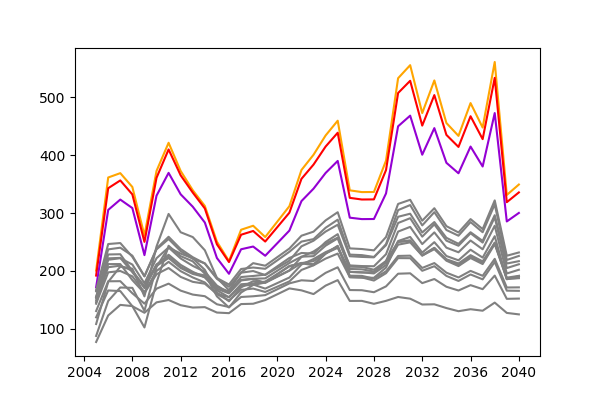

In [22]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [6,4]

plt.plot(raw_price_all.iloc[6:-8, 0].div(22.0462), 'orange', label='Cathode')
plt.plot(raw_price_all.iloc[6:-8, 8].div(22.0462), 'red', label='No.1')
plt.plot(raw_price_all.iloc[6:-8, 9].div(22.0462), 'darkviolet', label='No.2')

plt.plot(raw_price_all.iloc[6:-8, 10:].div(22.0462), 'grey')

#plt.xlabel('Year')
#plt.ylabel('Metal prices in $/tonne')
#plt.legend(bbox_to_anchor=(1, 0.5), loc=10, ncol=1, borderaxespad=0.)
#plt.legend()

plt.show()

# Test raw material consumption

In [9]:
start_time_all = datetime(2018,1,1)
end_time_all = datetime(2020,1,1)

In [15]:
tota_raw_series_low = raw_consumption(alloy_prod=alloy_prod, alloy_breakdown=alloy_breakdown_cen,
                                      start_time=start_time_all, end_time=end_time_all,
                                      other_metal_count=0, seed=1120, vol_mean=vol_mean, vol_std=vol_std, verbose=1)

Academic license - for non-commercial use only


GurobiError: Constant is Nan

In [9]:
tota_raw_series_high = raw_consumption(alloy_prod=alloy_prod, alloy_breakdown=alloy_breakdown,
                                       start_time=start_time_all, end_time=end_time_all,
                                       other_metal_count=1, seed=1120, vol_mean=vol_mean, vol_std=vol_std, verbose=0)

In [10]:
tota_raw_series_med  = raw_consumption(alloy_prod=alloy_prod, alloy_breakdown=alloy_breakdown,
                                       start_time=start_time_all, end_time=end_time_all,
                                       other_metal_count=0.5, seed=1120, vol_mean=vol_mean, vol_std=vol_std, verbose=0)

In [11]:
raw_med_specs = raw_specs_middle()
copper_content_series = pd.DataFrame(np.matmul(tota_raw_series_low, raw_med_specs), 
                                     index=tota_raw_series_low.index, columns=raw_med_specs.columns).loc[:, 'Cu']

## Alloy breakdown

In [12]:
import seaborn as sns
pal_0 = sns.color_palette("rainbow",23)
pal_1 = sns.color_palette("rainbow",15)
pal_2 = sns.color_palette("rainbow",8)
us_scrap_consumption = pd.read_excel('Back test data/US scrap consumption.xlsx', sheet_name='Brass mill', index_col=0)

<IPython.core.display.Javascript object>


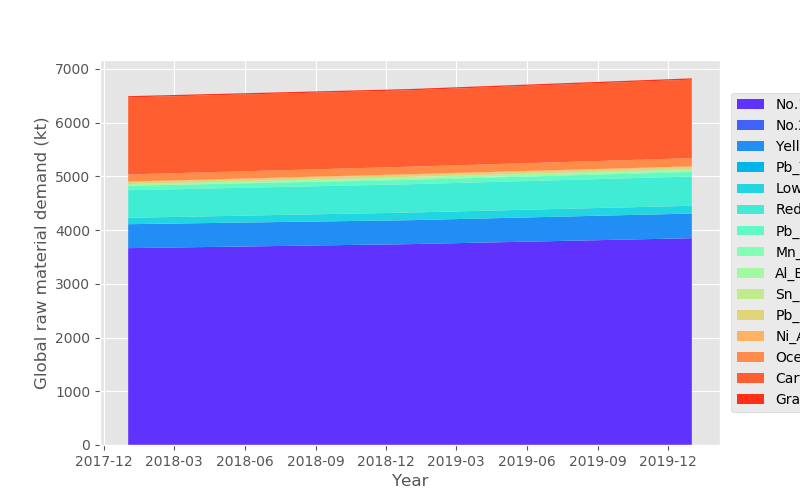

In [13]:
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8,5]

plt.stackplot(tota_raw_series_med.iloc[:, 8:].index, tota_raw_series_med.iloc[:, 8:].transpose(), 
              labels=tota_raw_series_med.iloc[:, 8:].columns, colors=pal_1)

plt.xlabel('Year')
plt.ylabel('Global raw material demand (kt)')
plt.legend(bbox_to_anchor=(1.15, 0.5), loc=10, ncol=1, borderaxespad=0.)
plt.show()

<IPython.core.display.Javascript object>


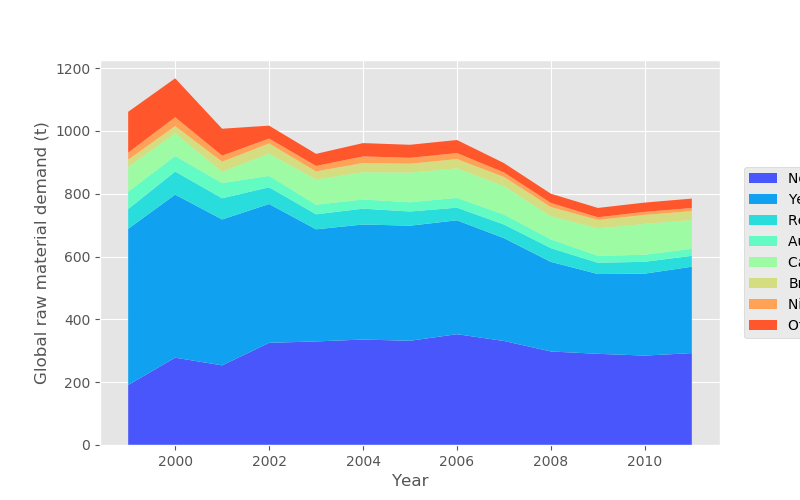

In [54]:
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8,5]

plt.stackplot(us_scrap_consumption.div(1e3).index, us_scrap_consumption.div(1e3).transpose(), 
              labels=us_scrap_consumption.div(1e3).columns, colors=pal_2)

plt.xlabel('Year')
plt.ylabel('Global raw material demand (t)')
plt.legend(bbox_to_anchor=(1.2, 0.5), loc=10, ncol=1, borderaxespad=0.)
plt.show()


## By cateogry

How unalloyed, alloyed and refined moved as function of s

In [27]:
consum_by_cat = pd.DataFrame({'Refined_low': tota_raw_series_low.iloc[:,:8].sum(axis=1),
                              'Refined_med': tota_raw_series_med.iloc[:,:8].sum(axis=1),
                              'Refined_high': tota_raw_series_high.iloc[:,:8].sum(axis=1),
                              'Unalloyed_low': tota_raw_series_low.iloc[:,8:10].sum(axis=1),
                              'Unalloyed_med': tota_raw_series_med.iloc[:,8:10].sum(axis=1),
                              'Unalloyed_high': tota_raw_series_high.iloc[:,8:10].sum(axis=1),
                              'Alloyed_low': tota_raw_series_low.iloc[:,10:].sum(axis=1),
                              'Alloyed_med': tota_raw_series_med.iloc[:,10:].sum(axis=1),
                              'Alloyed_high': tota_raw_series_high.iloc[:,10:].sum(axis=1)})

<IPython.core.display.Javascript object>


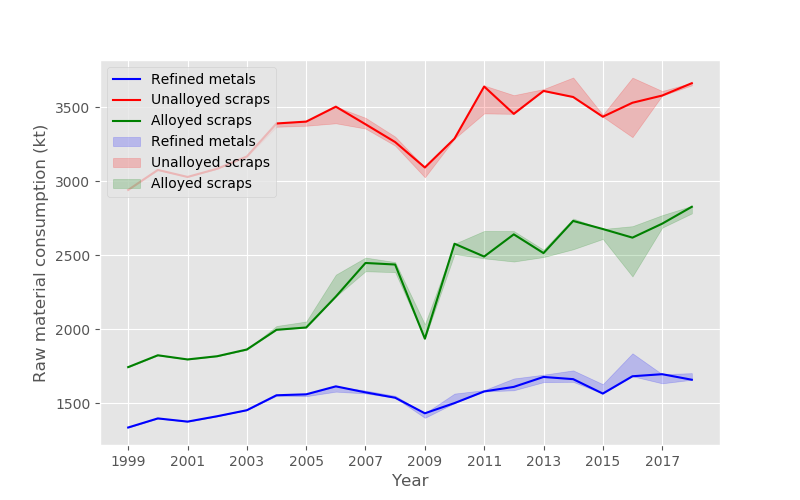

In [44]:
%matplotlib notebook
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [8,5]

plt.plot(consum_by_cat.iloc[:, 1], color='b', label='Refined metals')
plt.fill_between(consum_by_cat.index, consum_by_cat.iloc[:,:3].min(axis=1), consum_by_cat.iloc[:,:3].max(axis=1), 
                 alpha=0.2, color='b', label='Refined metals')

plt.plot(consum_by_cat.iloc[:, 4], color='r', label='Unalloyed scraps')
plt.fill_between(consum_by_cat.index, consum_by_cat.iloc[:,3:6].min(axis=1), consum_by_cat.iloc[:,3:6].max(axis=1), 
                 alpha=0.2, color='r', label='Unalloyed scraps')

plt.plot(consum_by_cat.iloc[:, 7], color='g', label='Alloyed scraps')
plt.fill_between(consum_by_cat.index, consum_by_cat.iloc[:,6:9].min(axis=1), consum_by_cat.iloc[:,6:9].max(axis=1), 
                 alpha=0.2, color='g', label='Alloyed scraps')

plt.legend(loc=2)

plt.xlabel('Year')
plt.ylabel('Raw material consumption (kt)')
plt.show()

### Coeficient of variation

By type

In [98]:
print('Refined COV:',(consum_by_cat.iloc[:,:3].max(axis=1) - consum_by_cat.iloc[:,:3].min(axis=1)).div(consum_by_cat.iloc[:, 1]).mean()*100)
print('Unalloyed COV:',(consum_by_cat.iloc[:,3:6].max(axis=1) - consum_by_cat.iloc[:,3:6].min(axis=1)).div(consum_by_cat.iloc[:, 4]).mean()*100)
print('Alloyed COV:',(consum_by_cat.iloc[:,6:9].max(axis=1) - consum_by_cat.iloc[:,6:9].min(axis=1)).div(consum_by_cat.iloc[:, 7]).mean()*100)


Refined COV: 2.242325691109493
Unalloyed COV: 1.8569227267144222
Alloyed COV: 3.4858825365736994


By alloy

In [100]:
cov_series = pd.Series(0, index=tota_raw_series_med.columns)
for r in cov_series.index:
    r_range = pd.DataFrame({'High': tota_raw_series_high.loc[:,r], 
                            'Med': tota_raw_series_med.loc[:,r], 
                            'Low': tota_raw_series_low.loc[:,r]})
    r_cov_series = (r_range.max(axis=1)-r_range.min(axis=1)).div(tota_raw_series_med.loc[:,r]).mul(100)
    r_cov_series = r_cov_series.replace([np.inf, -np.inf], np.nan)
    r_cov = r_cov_series.mean(skipna=True)
    
    cov_series.loc[r] = r_cov
    cov_series = cov_series.fillna(0)

In [101]:
cov_series.fillna(0)

Raw_material
Ref_Cu             1291.772120
Ref_Zn                3.057166
Ref_Pb                9.253343
Ref_Sn                1.535607
Ref_Ni                0.410736
Ref_Al                1.039587
Ref_Mn                2.072407
Ref_Fe                1.503528
No.1                  1.856923
No.2                  0.000000
Yellow_Brass         31.050125
Pb_Yellow_Brass       0.000000
Low_brass           490.989264
Red_Brass            25.093146
Pb_Red_Brass         41.915345
Mn_Bronze             0.000000
Al_Bronze           136.421684
Sn_Bronze           155.450955
Pb_Sn_Bronze        123.065026
Ni_Ag               625.119182
Ocean                15.157350
Cartridge            65.449357
Grape                14.835754
dtype: float64